In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu10 = pd.read_csv('AHU_10.csv')
ahu10 = ahu10.ffill()
ahu10.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16
0,31-12-2015,00:00:00,ON,1.0,93.8,ON,7.2,70.4,OPEN,79.9,20.0,96.8,15.0,96.6,15.0,76.5
1,31-12-2015,00:01:48,ON,1.0,93.8,ON,7.2,70.4,OPEN,79.9,20.0,96.8,15.0,96.6,15.0,76.5
2,31-12-2015,00:02:00,ON,1.0,93.8,ON,7.2,70.4,OPEN,79.9,20.0,96.8,15.0,96.6,15.0,76.5
3,31-12-2015,00:02:19,ON,1.0,93.8,ON,7.2,70.4,OPEN,79.9,20.0,96.8,15.0,96.6,15.0,76.5
4,31-12-2015,00:02:34,ON,1.0,93.8,ON,7.2,70.4,OPEN,79.9,20.0,96.8,15.0,96.6,15.0,76.5


In [3]:
ahu10.rename(columns={'Column1': 'Date', 'Column2': 'Time', 'Column3':'supply fan ON?OFF', 'Column4' : 'Cooling coil valve %open'},inplace=True)
ahu10.rename(columns={'Column5': 'Discharger temperature', 'Column6': 'exhaust fans ON?OFF', 'Column7':'Mixed air damper % open', 'Column8' : 'Mixed air temperature '},inplace=True)
ahu10.rename(columns={'Column9': 'Minimum outside air damper % open', 'Column10': 'Pre-heat coil discharger temperature', 'Column11':'Pre-heat coil Discharger value'},inplace=True)
ahu10.rename(columns={'Column12': 'Re-heat coil 1 discharger temperature', 'Column13': 'Re-heat coil 1 Discharger value', 'Column14':'Re-heat coil 2 discharger temperature'},inplace=True)
ahu10.rename(columns={'Column15': 'Re-heat coil 2 Discharger value', 'Column16': 'Return air temperature'},inplace=True)
print list(ahu10.columns.values)
ahu10.head()

['Date', 'Time', 'supply fan ON?OFF', 'Cooling coil valve %open', 'Discharger temperature', 'exhaust fans ON?OFF', 'Mixed air damper % open', 'Mixed air temperature ', 'Minimum outside air damper % open', 'Pre-heat coil discharger temperature', 'Pre-heat coil Discharger value', 'Re-heat coil 1 discharger temperature', 'Re-heat coil 1 Discharger value', 'Re-heat coil 2 discharger temperature', 'Re-heat coil 2 Discharger value', 'Return air temperature']


,Date,Time,supply fan ON?OFF,Cooling coil valve %open,Discharger temperature,exhaust fans ON?OFF,Mixed air damper % open,Mixed air temperature,Minimum outside air damper % open,Pre-heat coil discharger temperature,Pre-heat coil Discharger value,Re-heat coil 1 discharger temperature,Re-heat coil 1 Discharger value,Re-heat coil 2 discharger temperature,Re-heat coil 2 Discharger value,Return air temperature
0,31-12-2015,00:00:00,ON,1.0,93.8,ON,7.2,70.4,OPEN,79.9,20.0,96.8,15.0,96.6,15.0,76.5
1,31-12-2015,00:01:48,ON,1.0,93.8,ON,7.2,70.4,OPEN,79.9,20.0,96.8,15.0,96.6,15.0,76.5
2,31-12-2015,00:02:00,ON,1.0,93.8,ON,7.2,70.4,OPEN,79.9,20.0,96.8,15.0,96.6,15.0,76.5
3,31-12-2015,00:02:19,ON,1.0,93.8,ON,7.2,70.4,OPEN,79.9,20.0,96.8,15.0,96.6,15.0,76.5
4,31-12-2015,00:02:34,ON,1.0,93.8,ON,7.2,70.4,OPEN,79.9,20.0,96.8,15.0,96.6,15.0,76.5


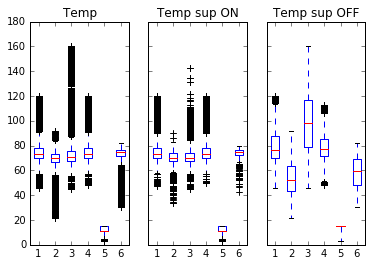

In [7]:
data_temp=[ahu10['Discharger temperature'],ahu10['Mixed air temperature '],ahu10['Pre-heat coil discharger temperature'],
           ahu10['Re-heat coil 1 discharger temperature'],ahu10['Re-heat coil 2 Discharger value'],ahu10['Return air temperature']]
sup_on = ahu10[ahu10['supply fan ON?OFF'].str.contains('ON')]
sup_off = ahu10[ahu10['supply fan ON?OFF'].str.contains('OFF')]
data_temp_1=[sup_on['Discharger temperature'],sup_on['Mixed air temperature '],sup_on['Pre-heat coil discharger temperature'],
           sup_on['Re-heat coil 1 discharger temperature'],sup_on['Re-heat coil 2 Discharger value'],sup_on['Return air temperature']]
data_temp_2=[sup_off['Discharger temperature'],sup_off['Mixed air temperature '],sup_off['Pre-heat coil discharger temperature'],
           sup_off['Re-heat coil 1 discharger temperature'],sup_off['Re-heat coil 2 Discharger value'],sup_off['Return air temperature']]
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_temp)
ax1.set_title('Temp')
ax2.boxplot(data_temp_1)
ax2.set_title('Temp sup ON')
ax3.boxplot(data_temp_2)
ax3.set_title('Temp sup OFF')
#plt.show()
plt.savefig(''.join(['temperature','_ahu_10']))

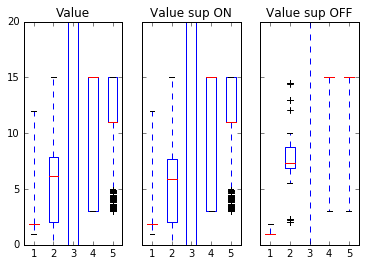

In [8]:
data_value=[ahu10['Cooling coil valve %open'],ahu10['Mixed air damper % open'],ahu10['Pre-heat coil Discharger value'],
            ahu10['Re-heat coil 1 Discharger value'],ahu10['Re-heat coil 2 Discharger value']]
data_value_1=[sup_on['Cooling coil valve %open'],sup_on['Mixed air damper % open'],sup_on['Pre-heat coil Discharger value'],
            sup_on['Re-heat coil 1 Discharger value'],sup_on['Re-heat coil 2 Discharger value']]
data_value_2=[sup_off['Cooling coil valve %open'],sup_off['Mixed air damper % open'],sup_off['Pre-heat coil Discharger value'],
            sup_off['Re-heat coil 1 Discharger value'],sup_off['Re-heat coil 2 Discharger value']]
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_value)
ax1.set_title('Value')
ax2.boxplot(data_value_1)
ax2.set_title('Value sup ON')
ax3.boxplot(data_value_2)
ax3.set_title('Value sup OFF')
#plt.show()
plt.savefig(''.join(['values%','_ahu_10']))

In [20]:
df1 = ahu10.copy()
print list(ahu10.columns.values)
df1=df1.drop(['Date', 'Time', 'supply fan ON?OFF', 'exhaust fans ON?OFF','Minimum outside air damper % open'],1)
print list(df1.columns.values)

['Date', 'Time', 'supply fan ON?OFF', 'Cooling coil valve %open', 'Discharger temperature', 'exhaust fans ON?OFF', 'Mixed air damper % open', 'Mixed air temperature ', 'Minimum outside air damper % open', 'Pre-heat coil discharger temperature', 'Pre-heat coil Discharger value', 'Re-heat coil 1 discharger temperature', 'Re-heat coil 1 Discharger value', 'Re-heat coil 2 discharger temperature', 'Re-heat coil 2 Discharger value', 'Return air temperature']
['Cooling coil valve %open', 'Discharger temperature', 'Mixed air damper % open', 'Mixed air temperature ', 'Pre-heat coil discharger temperature', 'Pre-heat coil Discharger value', 'Re-heat coil 1 discharger temperature', 'Re-heat coil 1 Discharger value', 'Re-heat coil 2 discharger temperature', 'Re-heat coil 2 Discharger value', 'Return air temperature']


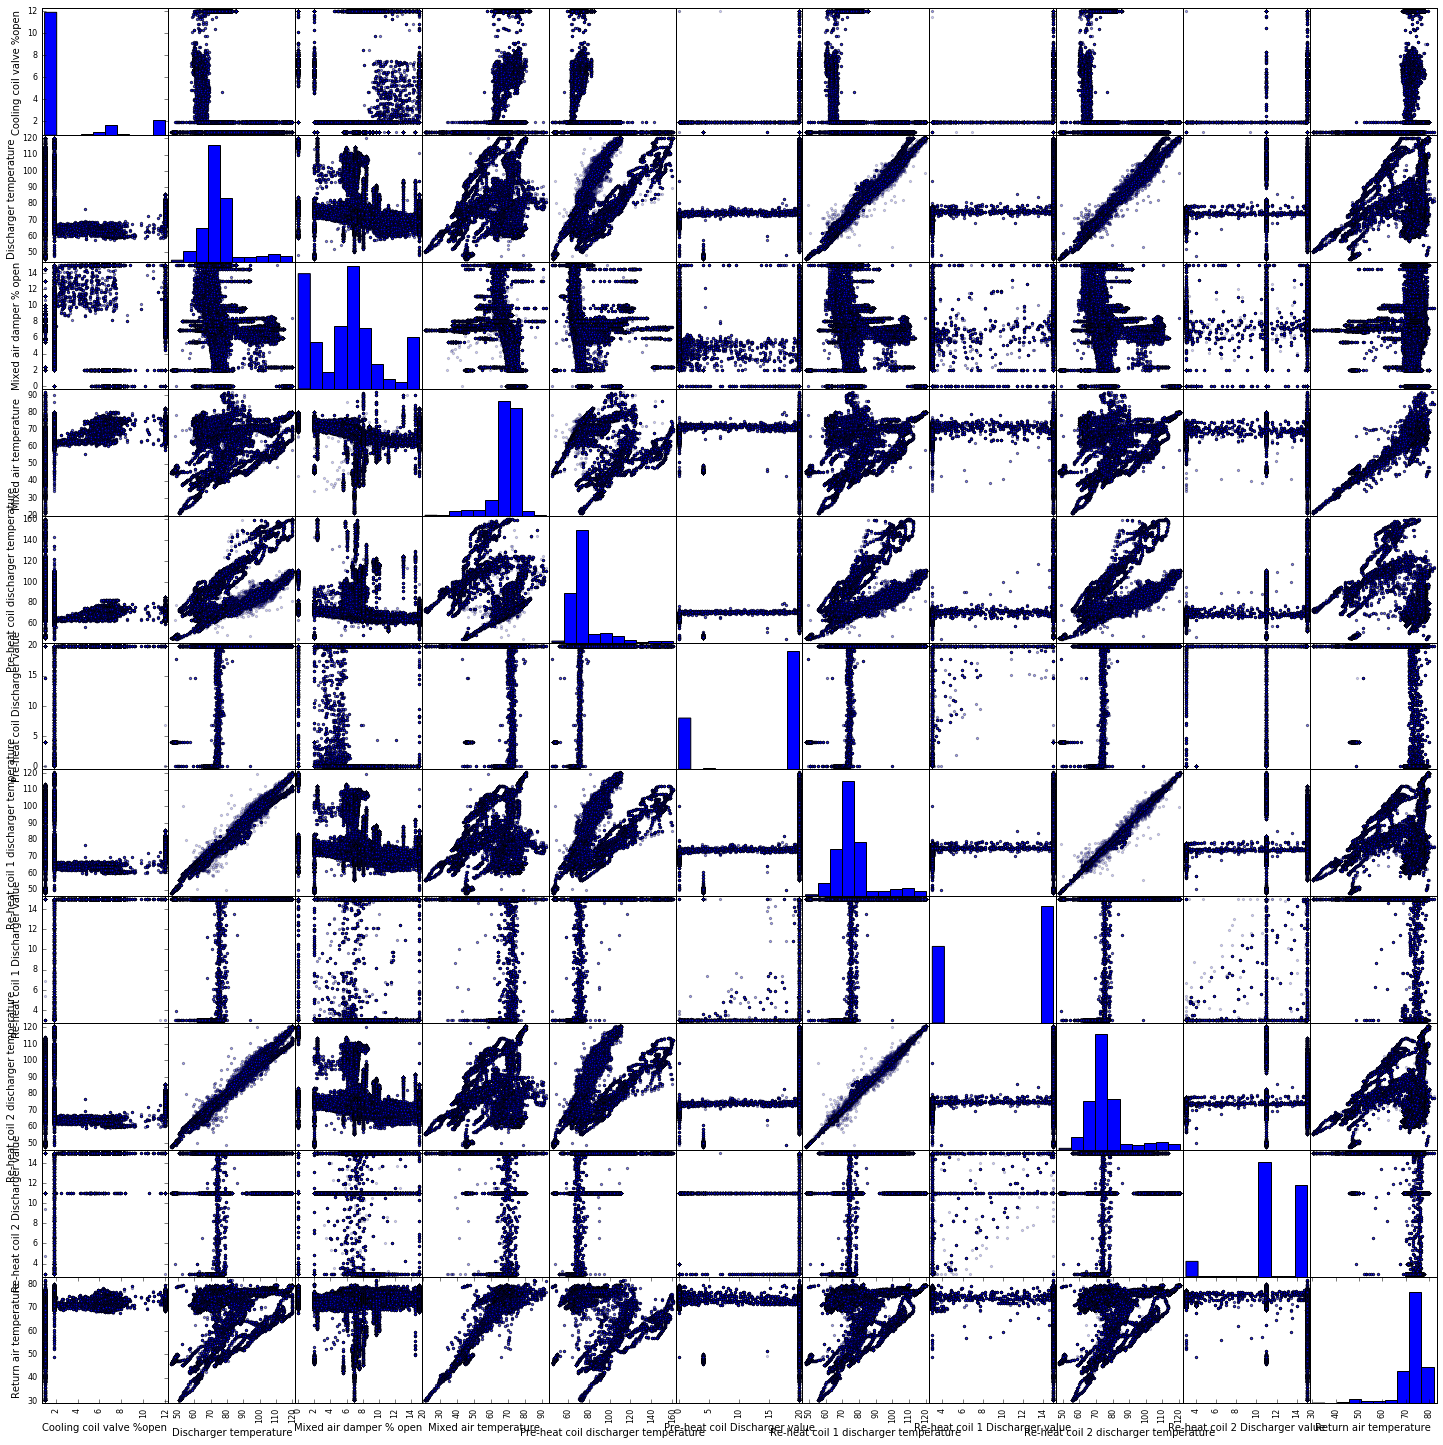

In [22]:
df = pd.scatter_matrix(df1,alpha=0.2,figsize=(25,25))
plt.savefig(''.join(['bivariate','_ahu_10']))